In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv("./data_AV_LTFS DataScience FinHack/test.csv", index_col = 0)
data = pd.read_csv("./data_AV_LTFS DataScience FinHack/train.csv", index_col = 0)
data.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
UniqueID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
data.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                 

In [5]:
data.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [6]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns

['disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

In [7]:
categorical_feature_columns = list(set(data.columns) - set(numerical_feature_columns))
categorical_feature_columns

['Date.of.Birth',
 'Employment.Type',
 'CREDIT.HISTORY.LENGTH',
 'DisbursalDate',
 'AVERAGE.ACCT.AGE',
 'PERFORM_CNS.SCORE.DESCRIPTION']

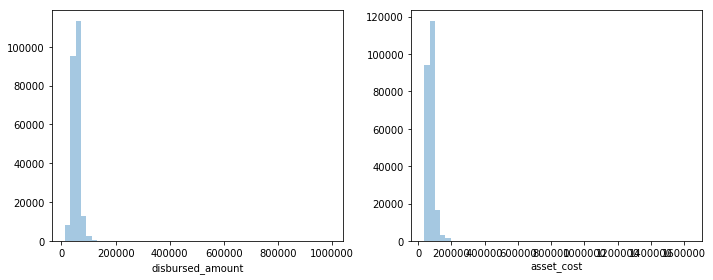

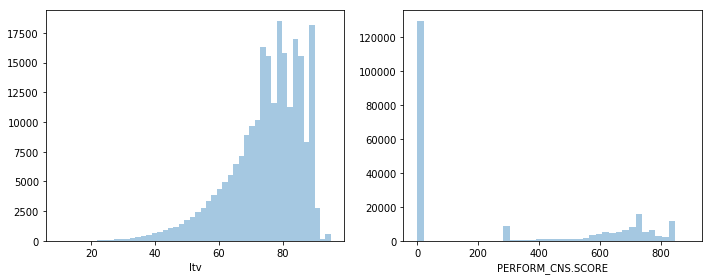

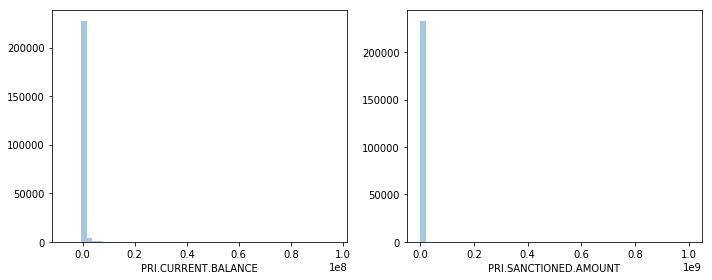

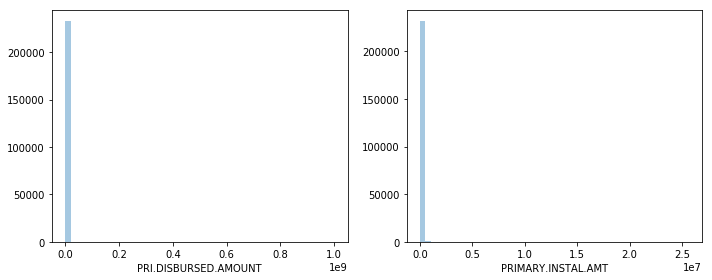

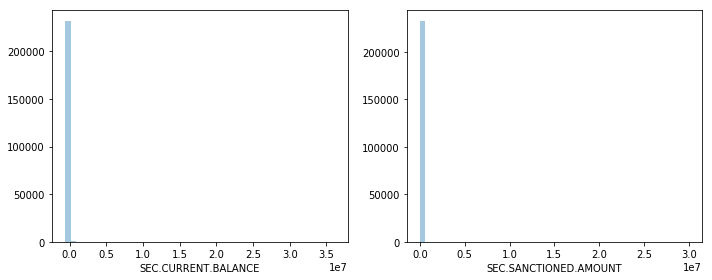

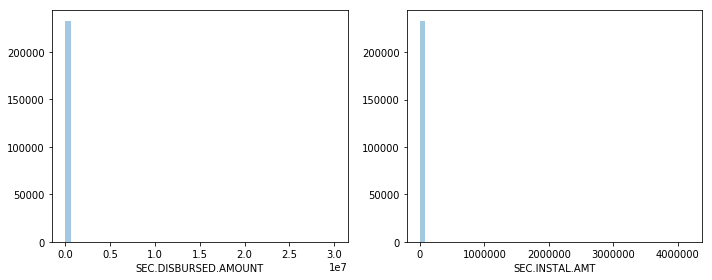

In [8]:
num_cols = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT']

for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(data[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data[num_cols[i]], kde=False)

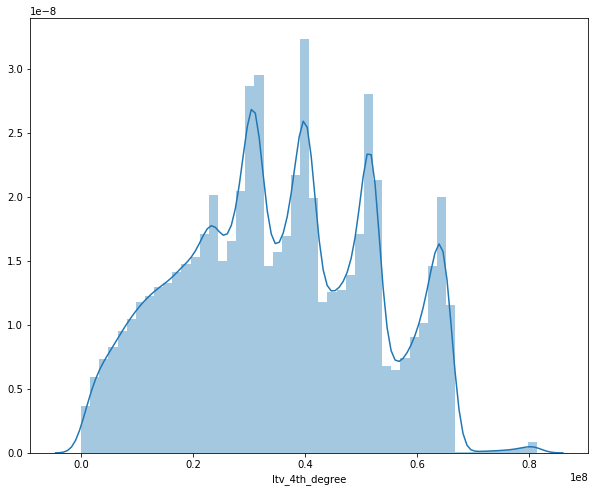

In [9]:
data['ltv_4th_degree']  =data['ltv']**4
plt.figure(figsize = (10,8))
sns.distplot(data['ltv_4th_degree'])

test['ltv_4th_degree']  =test['ltv']**4

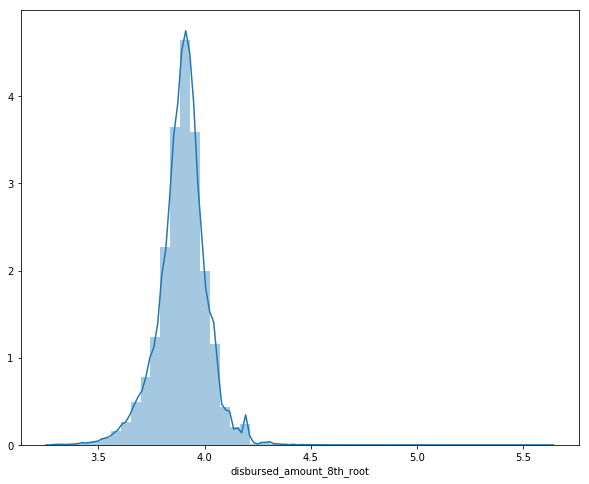

In [10]:
data['disbursed_amount_8th_root']  =data['disbursed_amount']**(1/8)
test['disbursed_amount_8th_root']  =test['disbursed_amount']**(1/8)
plt.figure(figsize = (10,8))
sns.distplot(data['disbursed_amount_8th_root'])

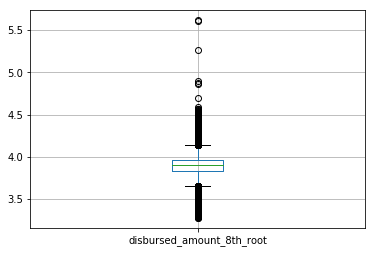

In [11]:
data.boxplot('disbursed_amount_8th_root')

In [12]:
mask1 = (data['disbursed_amount_8th_root'] < 4.5) & (data['disbursed_amount_8th_root'] > 3.5)
data = data[mask1]
data.shape
mask2 = (test['disbursed_amount_8th_root'] < 4.5) & (test['disbursed_amount_8th_root'] > 3.5)
test = test[mask2]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232322 entries, 420825 to 630213
Data columns (total 42 columns):
disbursed_amount                       232322 non-null int64
asset_cost                             232322 non-null int64
ltv                                    232322 non-null float64
branch_id                              232322 non-null int64
supplier_id                            232322 non-null int64
manufacturer_id                        232322 non-null int64
Current_pincode_ID                     232322 non-null int64
Date.of.Birth                          232322 non-null object
Employment.Type                        224679 non-null object
DisbursalDate                          232322 non-null object
State_ID                               232322 non-null int64
Employee_code_ID                       232322 non-null int64
MobileNo_Avl_Flag                      232322 non-null int64
Aadhar_flag                            232322 non-null int64
PAN_flag                 

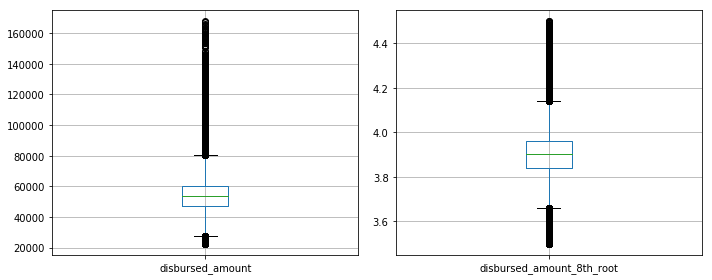

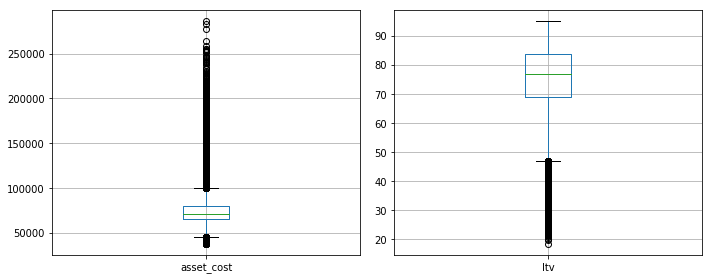

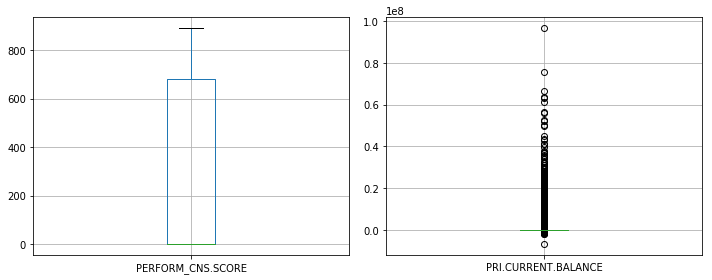

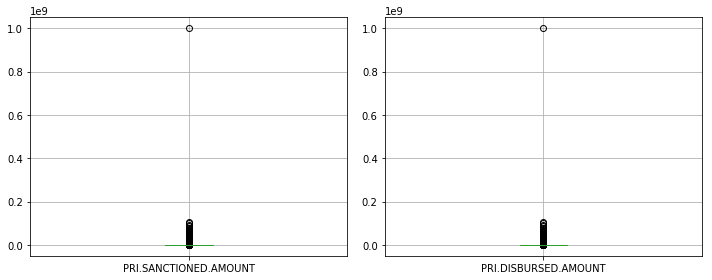

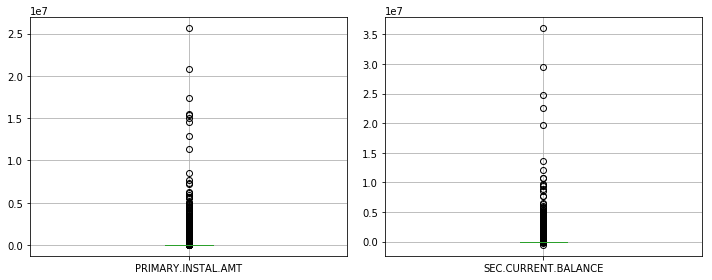

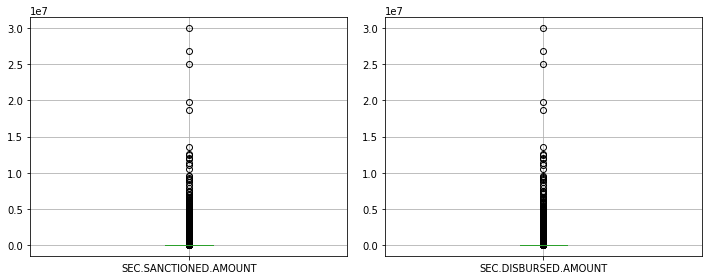

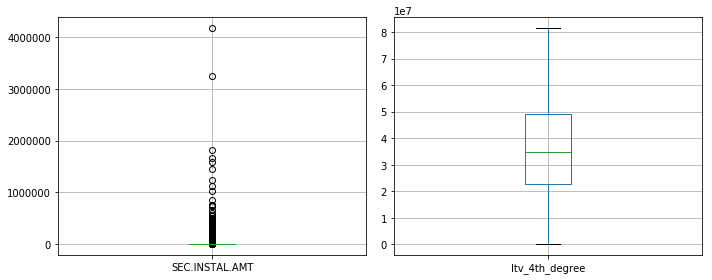

In [14]:
num_cols = ['disbursed_amount','disbursed_amount_8th_root','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT','ltv_4th_degree']

for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        data.boxplot(num_cols[i])
        plt.subplot(122)            
        data.boxplot(num_cols[i+1])
        plt.tight_layout()
        plt.show()

    else:
        data.boxplot(num_cols[i])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232322 entries, 420825 to 630213
Data columns (total 42 columns):
disbursed_amount                       232322 non-null int64
asset_cost                             232322 non-null int64
ltv                                    232322 non-null float64
branch_id                              232322 non-null int64
supplier_id                            232322 non-null int64
manufacturer_id                        232322 non-null int64
Current_pincode_ID                     232322 non-null int64
Date.of.Birth                          232322 non-null object
Employment.Type                        224679 non-null object
DisbursalDate                          232322 non-null object
State_ID                               232322 non-null int64
Employee_code_ID                       232322 non-null int64
MobileNo_Avl_Flag                      232322 non-null int64
Aadhar_flag                            232322 non-null int64
PAN_flag                 

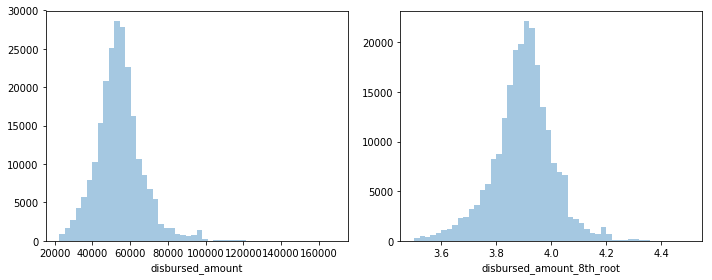

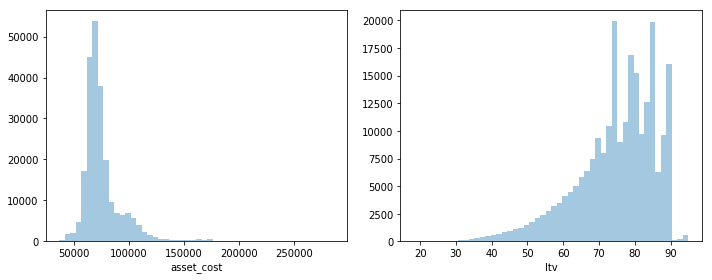

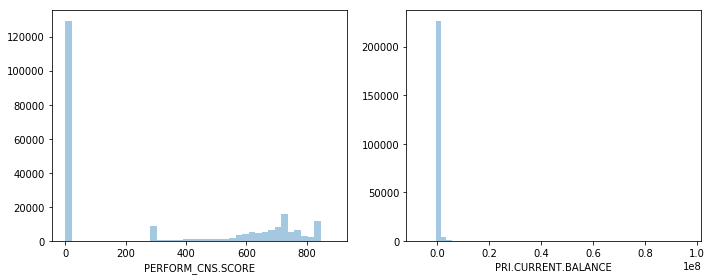

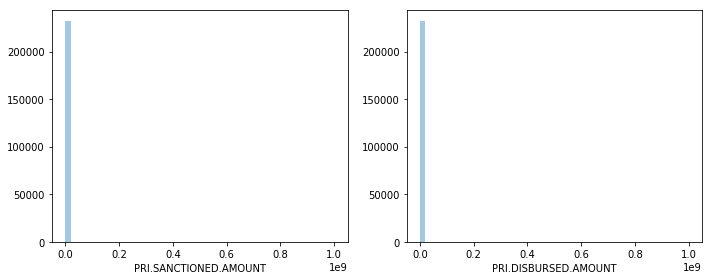

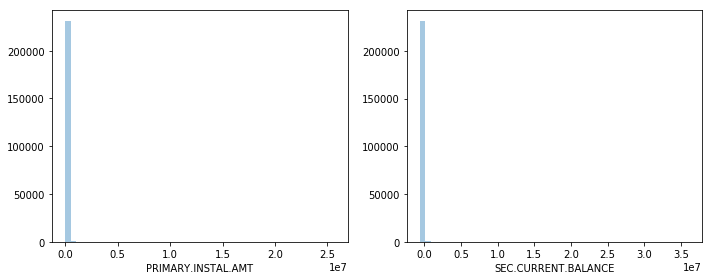

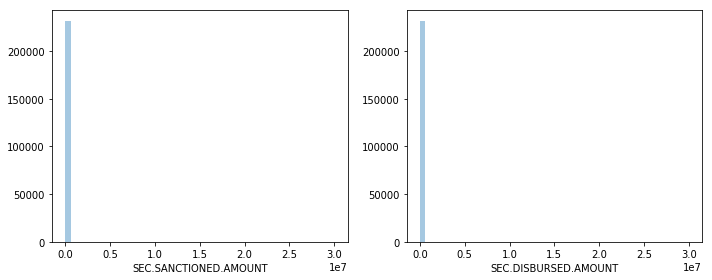

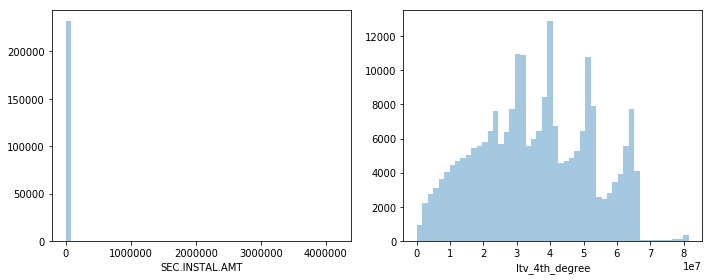

In [16]:
num_cols = ['disbursed_amount','disbursed_amount_8th_root','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT','SEC.INSTAL.AMT','ltv_4th_degree']

for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(data[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(data[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(data[num_cols[i]], kde=False)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232322 entries, 420825 to 630213
Data columns (total 42 columns):
disbursed_amount                       232322 non-null int64
asset_cost                             232322 non-null int64
ltv                                    232322 non-null float64
branch_id                              232322 non-null int64
supplier_id                            232322 non-null int64
manufacturer_id                        232322 non-null int64
Current_pincode_ID                     232322 non-null int64
Date.of.Birth                          232322 non-null object
Employment.Type                        224679 non-null object
DisbursalDate                          232322 non-null object
State_ID                               232322 non-null int64
Employee_code_ID                       232322 non-null int64
MobileNo_Avl_Flag                      232322 non-null int64
Aadhar_flag                            232322 non-null int64
PAN_flag                 

In [18]:
data[categorical_feature_columns].head()

,Date.of.Birth,Employment.Type,CREDIT.HISTORY.LENGTH,DisbursalDate,AVERAGE.ACCT.AGE,PERFORM_CNS.SCORE.DESCRIPTION
UniqueID,,,,,,
420825,01-01-84,Salaried,0yrs 0mon,03-08-18,0yrs 0mon,No Bureau History Available
537409,31-07-85,Self employed,1yrs 11mon,26-09-18,1yrs 11mon,I-Medium Risk
417566,24-08-85,Self employed,0yrs 0mon,01-08-18,0yrs 0mon,No Bureau History Available
624493,30-12-93,Self employed,1yrs 3mon,26-10-18,0yrs 8mon,L-Very High Risk
539055,09-12-77,Self employed,0yrs 0mon,26-09-18,0yrs 0mon,No Bureau History Available


In [19]:
data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
data['AVERAGE.ACCT.AGE'] = data['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
data['CREDIT.HISTORY.LENGTH'] = data['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)
data[categorical_feature_columns].head()

test['AVERAGE.ACCT.AGE'] = test['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
test['AVERAGE.ACCT.AGE'] = test['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
test['CREDIT.HISTORY.LENGTH'] = test['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
test['CREDIT.HISTORY.LENGTH'] = test['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)

In [20]:
data['Employment.Type'].isnull().sum()

7643

In [21]:
total_null = data.isnull().sum()
percent_null = (total_null/(data.isnull().count())) * 100
missing_data = pd.concat([total_null,percent_null], keys=['Total','Percent'],axis=1)
print(missing_data)

                                     Total  Percent
disbursed_amount                         0  0.00000
asset_cost                               0  0.00000
ltv                                      0  0.00000
branch_id                                0  0.00000
supplier_id                              0  0.00000
manufacturer_id                          0  0.00000
Current_pincode_ID                       0  0.00000
Date.of.Birth                            0  0.00000
Employment.Type                       7643  3.28983
DisbursalDate                            0  0.00000
State_ID                                 0  0.00000
Employee_code_ID                         0  0.00000
MobileNo_Avl_Flag                        0  0.00000
Aadhar_flag                              0  0.00000
PAN_flag                                 0  0.00000
VoterID_flag                             0  0.00000
Driving_flag                             0  0.00000
Passport_flag                            0  0.00000
PERFORM_CNS.

In [22]:
data.dropna(inplace=True)
total_null_1 = data.isnull().sum()
percent_null_1 = (total_null_1/(data.isnull().count())) * 100
missing_data_1 = pd.concat([total_null_1,percent_null_1], keys=['Total','Percent'],axis=1)
print(missing_data_1)

test.dropna(inplace=True)

                                     Total  Percent
disbursed_amount                         0      0.0
asset_cost                               0      0.0
ltv                                      0      0.0
branch_id                                0      0.0
supplier_id                              0      0.0
manufacturer_id                          0      0.0
Current_pincode_ID                       0      0.0
Date.of.Birth                            0      0.0
Employment.Type                          0      0.0
DisbursalDate                            0      0.0
State_ID                                 0      0.0
Employee_code_ID                         0      0.0
MobileNo_Avl_Flag                        0      0.0
Aadhar_flag                              0      0.0
PAN_flag                                 0      0.0
VoterID_flag                             0      0.0
Driving_flag                             0      0.0
Passport_flag                            0      0.0
PERFORM_CNS.

In [23]:
data.shape

(224679, 42)

In [24]:
data['Employment.Type'].unique()

array(['Salaried', 'Self employed'], dtype=object)

In [25]:
data['Employment.Type'].replace({'Salaried':0, 'Self employed': 1}, inplace = True)
test['Employment.Type'].replace({'Salaried':0, 'Self employed': 1}, inplace = True)

In [26]:
data.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,ltv_4th_degree,disbursed_amount_8th_root
UniqueID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-84,0,03-08-18,...,0,0,0,0,0.00,0.00,0,0,6.430761e+07,3.872534
537409,47145,65550,73.23,67,22807,45,1502,31-07-85,1,26-09-18,...,1991,0,0,1,1.11,1.11,0,1,2.875783e+07,3.838658
417566,53278,61360,89.63,67,22807,45,1497,24-08-85,1,01-08-18,...,0,0,0,0,0.00,0.00,0,0,6.453772e+07,3.897790
624493,57513,66113,88.48,67,22807,45,1501,30-12-93,1,26-10-18,...,31,0,0,0,0.80,1.30,1,1,6.128871e+07,3.935236
539055,52378,60300,88.39,67,22807,45,1495,09-12-77,1,26-09-18,...,0,0,0,0,0.00,0.00,1,1,6.103972e+07,3.889499


In [27]:
data.drop(['disbursed_amount','ltv','Date.of.Birth','DisbursalDate','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace=True)
test.drop(['disbursed_amount','ltv','Date.of.Birth','DisbursalDate','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224679 entries, 420825 to 630213
Data columns (total 37 columns):
asset_cost                             224679 non-null int64
branch_id                              224679 non-null int64
supplier_id                            224679 non-null int64
manufacturer_id                        224679 non-null int64
Current_pincode_ID                     224679 non-null int64
Employment.Type                        224679 non-null int64
State_ID                               224679 non-null int64
Employee_code_ID                       224679 non-null int64
MobileNo_Avl_Flag                      224679 non-null int64
Aadhar_flag                            224679 non-null int64
PAN_flag                               224679 non-null int64
VoterID_flag                           224679 non-null int64
Driving_flag                           224679 non-null int64
Passport_flag                          224679 non-null int64
PERFORM_CNS.SCORE             

In [29]:
data.isnull().sum().sum()

0

In [30]:
data.shape

(224679, 37)

In [31]:
data.nunique()

asset_cost                             45321
branch_id                                 82
supplier_id                             2943
manufacturer_id                            9
Current_pincode_ID                      6655
Employment.Type                            2
State_ID                                  22
Employee_code_ID                        3268
MobileNo_Avl_Flag                          1
Aadhar_flag                                2
PAN_flag                                   2
VoterID_flag                               2
Driving_flag                               2
Passport_flag                              2
PERFORM_CNS.SCORE                        573
PRI.NO.OF.ACCTS                          107
PRI.ACTIVE.ACCTS                          40
PRI.OVERDUE.ACCTS                         22
PRI.CURRENT.BALANCE                    69876
PRI.SANCTIONED.AMOUNT                  43649
PRI.DISBURSED.AMOUNT                   47099
SEC.NO.OF.ACCTS                           37
SEC.ACTIVE

In [32]:
data_corr = data.corr()
threshold = 0.5
corr_var_list = []
cols = data.columns.tolist()

for i in range(1, len(cols)):
    for j in range(i):
        if((abs(data_corr.iloc[i,j]) > threshold) & (abs(data_corr.iloc[i,j]) < 1)):
            corr_var_list.append([data_corr.iloc[i,j], i, j])

# Sort the list showing higher ones first 
s_corr_list = sorted(corr_var_list ,key = lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],corr_value))

SEC.OVERDUE.ACCTS and SEC.NO.OF.ACCTS = 0.51
SEC.OVERDUE.ACCTS and SEC.ACTIVE.ACCTS = 0.53
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.NO.OF.ACCTS = 0.54
disbursed_amount_8th_root and asset_cost = 0.67
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.ACTIVE.ACCTS = 0.70
PRI.ACTIVE.ACCTS and PRI.NO.OF.ACCTS = 0.75
CREDIT.HISTORY.LENGTH and AVERAGE.ACCT.AGE = 0.81
SEC.ACTIVE.ACCTS and SEC.NO.OF.ACCTS = 0.83
VoterID_flag and Aadhar_flag = -0.87
SEC.SANCTIONED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
SEC.DISBURSED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
PRI.DISBURSED.AMOUNT and PRI.SANCTIONED.AMOUNT = 1.00
SEC.DISBURSED.AMOUNT and SEC.SANCTIONED.AMOUNT = 1.00


In [33]:
data.drop(['PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT','SEC.CURRENT.BALANCE','VoterID_flag','AVERAGE.ACCT.AGE'], axis = 1, inplace = True)
test.drop(['PRI.SANCTIONED.AMOUNT','SEC.SANCTIONED.AMOUNT','SEC.CURRENT.BALANCE','VoterID_flag','AVERAGE.ACCT.AGE'], axis = 1, inplace = True)

In [34]:
data.shape

(224679, 32)

In [35]:
def dispaly_model_parameters(y_test, y_pred):
        print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
        print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
        print("Precision: ",metrics.precision_score(y_test, y_pred))
        print("Recall: ",metrics.recall_score(y_test, y_pred))
        print("f1 score: ",metrics.f1_score(y_test, y_pred))
        print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))


Distribution of the loan_default in the subsample dataset
0    0.782552
1    0.217448
Name: loan_default, dtype: float64


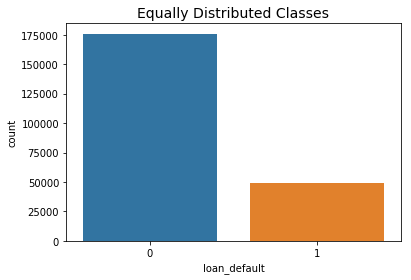

In [36]:
print('Distribution of the loan_default in the subsample dataset')
print(data['loan_default'].value_counts()/len(data))

sns.countplot('loan_default', data=data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# OverSampling to resolve Imbalance 

In [37]:
data = data.sample(frac=1)
loan_default_yes = data.loc[data['loan_default'] == 1]
loan_default_no = data.loc[data['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_yes, loan_default_yes,loan_default_yes,loan_default_no])

# Shuffle dataframe rows
new_data = normal_distributed_df.sample(frac=1, random_state=42)

new_data.head()

,asset_cost,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,ltv_4th_degree,disbursed_amount_8th_root
UniqueID,,,,,,,,,,,,,,,,,,,,,
600426,69232,79,22815,86,771,1,18,2109,1,1,...,0,0,0,0,0,0.6,0,1,6.558084e+07,3.964403
596910,67072,48,24178,45,6355,1,5,128,1,1,...,0,0,0,0,0,0.0,0,1,5.516022e+07,3.924842
585951,67793,5,23643,86,3344,1,9,571,1,0,...,0,6140,0,0,0,3.4,0,1,4.024789e+07,3.868499
516312,94640,36,18549,48,6583,0,13,1311,1,0,...,0,0,0,0,0,0.0,0,1,1.865478e+07,3.950341
533651,71035,74,17113,86,2578,1,4,2980,1,1,...,0,0,0,0,0,0.0,0,0,4.759570e+07,3.941580


Distribution of the loan_default in the subsample dataset
0    0.545372
1    0.454628
Name: loan_default, dtype: float64


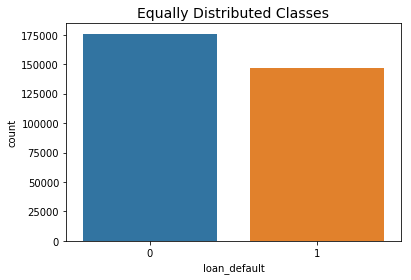

In [38]:
print('Distribution of the loan_default in the subsample dataset')
print(new_data['loan_default'].value_counts()/len(new_data))

sns.countplot('loan_default', data=new_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [39]:
new_data.shape

(322391, 32)

In [40]:
X = new_data.drop('loan_default', axis = 1)
y = new_data['loan_default'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


# Chi-Squared

In [41]:
# Select two features with highest chi-squared statistics

select_feature = SelectKBest(f_classif, k=12).fit(X_train, y_train)
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
29,ltv_4th_degree,3180.579404
30,disbursed_amount_8th_root,2589.791291
13,PERFORM_CNS.SCORE,1278.386252
6,State_ID,857.953927
27,CREDIT.HISTORY.LENGTH,729.805374
15,PRI.ACTIVE.ACCTS,682.783752
9,Aadhar_flag,608.702185
28,NO.OF_INQUIRIES,576.708075
16,PRI.OVERDUE.ACCTS,527.365325
14,PRI.NO.OF.ACCTS,441.818370


In [42]:
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [43]:
X_train = select_feature.transform(X_train)
X_test = select_feature.transform(X_test)
test = select_feature.transform(test)

In [44]:
print(type(test))

<class 'numpy.ndarray'>


In [45]:
X_test.shape

(96718, 12)

In [46]:
X_train.shape

(225673, 12)

# Logistic Regression

In [47]:
# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}
# Code starts here
lr = LogisticRegression()
grid = GridSearchCV(estimator = lr, param_grid = parameters)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[52796     0]
 [43922     0]]
Accuracy:  0.5458756384540623
Precision:  0.0
Recall:  0.0
f1 score:  0.0
roc_auc_score:  0.5


#  Decision Tree

In [48]:
parameters={'criterion':['gini','entropy'],'max_depth': [2,3,4,5]}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[32010 20786]
 [18837 25085]]
Accuracy:  0.5903244483963688
Precision:  0.5468596716879945
Recall:  0.5711260871545012
f1 score:  0.5587295223458398
roc_auc_score:  0.5887110093322321


In [49]:
rf = RandomForestClassifier(n_estimators=250, random_state = 33)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[43488  9308]
 [ 3260 40662]]
Accuracy:  0.8700552120598027
Precision:  0.8137282369421653
Recall:  0.9257775146851236
f1 score:  0.8661440804328377
roc_auc_score:  0.8747381398715411


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2),n_estimators = 200, algorithm = 'SAMME.R', learning_rate = 0.5, random_state = 42)
ada_clf.fit(X_train,y_train)
y_pred = ada_clf.predict(X_test)
dispaly_model_parameters(y_test, y_pred)

In [ ]:
model = rf

In [51]:
test_pred = model.predict(test)
test_pred = pd.DataFrame(test_pred)

In [58]:
subm = pd.read_csv('./data_AV_LTFS DataScience FinHack/sample_submission.csv')
subm["loan_default"] = test_pred
subm["loan_default"] = subm["loan_default"].astype('int', errors = 'ignore')
subm.to_csv("submission.csv", index=False)
subm.head()

,UniqueID,loan_default
0,655269,0.0
1,723482,0.0
2,758529,0.0
3,763449,1.0
4,708663,1.0
